### Upload AB 5.zip and roiData.zip

In [1]:
!pip install read-roi

In [2]:
from read_roi import read_roi_file as rf
from read_roi import read_roi_zip as rz

# Generating Samples of Data

## Synthetic Data Generation Method 1

In [25]:
import json
import matplotlib.pyplot as plt
import numpy as np

def read_roi_json(json_file_path):
    """
    Read ROI data from a JSON file.

    Args:
    json_file_path (str): Path to the JSON file containing ROI data.

    Returns:
    dict: The ROI data as a dictionary.
    """
    with open(json_file_path, 'r') as f:
        roi_data = json.load(f)
    return roi_data

def plot_rois(xy_coords, roi_names=None, image_size=(512, 512)):
    """
    Plot one or multiple ROIs on a black image.

    Args:
    xy_coords (dict or list): Either a dictionary of ROI coordinates or a list of (x, y) pairs for a single ROI.
    roi_names (str or list, optional): Name(s) of the ROI(s) to plot. If None, plot all ROIs in xy_coords.
    image_size (tuple, optional): Size of the image (height, width). Default is (512, 512).

    Returns:
    None: Displays the plot.
    """
    # Create a black background
    img = np.zeros(image_size)

    # Create a new figure
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='gray')

    # Define a color cycle for multiple ROIs
    colors = plt.cm.rainbow(np.linspace(0, 1, 10))

    # Check if we're dealing with a single ROI or multiple ROIs
    if isinstance(xy_coords, list):
        # Single ROI
        x, y = zip(*xy_coords)
        plt.plot(x, y, '-o', color=colors[0], linewidth=1, markersize=4)
        plt.title(f"ROI: {roi_names if roi_names else 'Unnamed'}")
    else:
        # Multiple ROIs
        if roi_names is None:
            roi_names = list(xy_coords.keys())
        elif isinstance(roi_names, str):
            roi_names = [roi_names]

        for i, roi_name in enumerate(roi_names):
            if roi_name in xy_coords:
                x, y = zip(*xy_coords[roi_name])
                plt.plot(x, y, '-o', color=colors[i % len(colors)], linewidth=1, markersize=4, label=roi_name)
            else:
                print(f"Warning: ROI '{roi_name}' not found in the provided coordinates.")

        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title("Multiple ROIs")

    plt.xlim(0, image_size[1])
    plt.ylim(image_size[0], 0)  # Invert y-axis to match image coordinates
    plt.tight_layout()
    plt.show()

def plot_roi_data(roi_data, file_names=None, image_size=(512, 512)):
    """
    Plot ROI data for specified file names.

    Args:
    roi_data (dict): Dictionary containing ROI data.
    file_names (str or list, optional): Name(s) of the file(s) to plot. If None, plot all files.
    image_size (tuple, optional): Size of the image (height, width). Default is (512, 512).

    Returns:
    None: Displays the plot(s).
    """
    # If file_names is not specified, use all files in the data
    if file_names is None:
        file_names = list(roi_data.keys())
    elif isinstance(file_names, str):
        file_names = [file_names]

    # Filter out any file names that are not in the data
    file_names = [f for f in file_names if f in roi_data]

    if not file_names:
        print("No valid file names provided.")
        return

    # Set up the plot
    n_files = len(file_names)
    n_cols = min(3, n_files)  # Max 3 columns
    n_rows = (n_files - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows), squeeze=False)
    fig.suptitle("ROI Plots", fontsize=16)

    # Color cycle for ROIs
    colors = plt.cm.rainbow(np.linspace(0, 1, 10))

    for i, file_name in enumerate(file_names):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col]

        # Create a black background
        img = np.zeros(image_size)
        ax.imshow(img, cmap='gray')

        # Plot ROIs for this file
        file_data = roi_data[file_name]
        for j, (roi_name, coordinates) in enumerate(file_data.items()):
            x, y = zip(*coordinates)
            ax.plot(x, y, '-o', color=colors[j % len(colors)], linewidth=0.5, markersize=2, label=roi_name)

        ax.set_xlim(0, image_size[1])
        ax.set_ylim(image_size[0], 0)  # Invert y-axis to match image coordinates
        ax.set_title(file_name)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small')

    # Remove any unused subplots
    for i in range(n_files, n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()


In [4]:
roi_data = read_roi_json("/content/roi_data_full.json")

In [5]:
roi_data.keys()

dict_keys(['BB 54', 'BB 59', 'BB 18', 'BB 4', 'AB 24', 'AB 64', 'AB 104', 'BB 62', 'AB 68', 'AB 11', 'AB 5', 'BB 12', 'AB 101', 'AB 51', 'AB 31', 'BB 109', 'BB 26', 'AB 12', 'BB 17', 'BB 20'])

In [6]:
for k in roi_data.keys():
    if "AB" in str(k):
        print(f"Key {k}: count {len(roi_data[k])}")

Key AB 24: count 73
Key AB 64: count 77
Key AB 104: count 84
Key AB 68: count 100
Key AB 11: count 40
Key AB 5: count 84
Key AB 101: count 86
Key AB 51: count 96
Key AB 31: count 70
Key AB 12: count 34


In [7]:
c = []
for k in roi_data.keys():
    c.append(len(roi_data[k]))
print(c)

[53, 55, 32, 55, 73, 77, 84, 31, 100, 40, 84, 38, 86, 96, 70, 42, 75, 34, 46, 40]


### Function to Sample From the Count Distribution

In [8]:
print(roi_data["AB 11"].keys())

dict_keys(['0238-0475', '0257-0461', '0246-0464', '0246-0466', '0268-0455', '0213-0446', '0213-0469', '0212-0453', '0198-0410', '0206-0412', '0230-0452', '0235-0414', '0229-0482', '0207-0418', '0258-0434', '0231-0401', '0261-0418', '0234-0376', '0248-0405', '0215-0364', '0208-0346', '0209-0376', '0191-0337', '0181-0282', '0192-0283', '0199-0328', '0211-0312', '0193-0269', '0171-0245', '0199-0254', '0169-0223', '0187-0225', '0198-0236', '0203-0229', '0202-0217', '0208-0226', '0251-0374', '0227-0470', '0201-0354', '0251-0440'])


In [17]:
import numpy as np
import scipy.stats as stats
import random

def fit_and_sample(data, num_samples):
    mu, std = stats.norm.fit(data)
    samples = np.random.normal(mu, std, num_samples)
    int_samples = np.maximum(np.round(samples).astype(int), 1)
    return int_samples

def round_coordinates(coordinates):
    return [[round(x, 2) for x in coord] for coord in coordinates]

def bootstrap_sample_filaments(roi_data, key_values, sample_sizes):
    all_filaments = []
    for key in key_values:
        all_filaments.extend(list(roi_data[key].values()))

    synthetic_data = {}
    for i, size in enumerate(sample_sizes, 1):
        sampled_data = {}
        bootstrap_sample = random.choices(all_filaments, k=size)

        for j, coordinates in enumerate(bootstrap_sample, 1):
            sampled_data[str(j)] = round_coordinates(coordinates)

        synthetic_data[f"SS{i}"] = sampled_data

    return synthetic_data

def create_synthetic_dataset(roi_data, key_values, num_synthetic_sets):
    counts = [len(roi_data[k]) for k in key_values]
    sampled_sizes = fit_and_sample(counts, num_synthetic_sets)
    synthetic_dataset = bootstrap_sample_filaments(roi_data, key_values, sampled_sizes)
    return synthetic_dataset

# Example usage:
key_values = ["AB 24", "AB 64", "AB 104", "AB 68", "AB 11", "AB 5", "AB 101", "AB 51", "AB 31", "AB 12"]
num_synthetic_sets = 20  # Change this to the number of synthetic sets you want
synthetic_dataset = create_synthetic_dataset(roi_data, key_values, num_synthetic_sets)

# Print the results
print("Synthetic Dataset Summary:")
for key, data in synthetic_dataset.items():
    print(f"{key}: count {len(data)}")

# Print a sample of filaments from one synthetic set
sample_key = list(synthetic_dataset.keys())[0]
print(f"\nSample of filaments for {sample_key}:")
for i, (filament_id, coordinates) in enumerate(list(synthetic_dataset[sample_key].items())[:5]):
    print(f"{filament_id}: {coordinates[:2]}...")  # Print only the first two coordinates for brevity
    if i == 4:  # Limit to 5 examples
        break

Synthetic Dataset Summary:
SS1: count 82
SS2: count 57
SS3: count 106
SS4: count 119
SS5: count 57
SS6: count 74
SS7: count 17
SS8: count 90
SS9: count 39
SS10: count 106
SS11: count 67
SS12: count 49
SS13: count 77
SS14: count 16
SS15: count 47
SS16: count 62
SS17: count 87
SS18: count 69
SS19: count 24
SS20: count 97

Sample of filaments for SS1:
1: [[205.25, 226.5], [205.0, 226.5]]...
2: [[205.0, 135.0], [204.75, 134.75]]...
3: [[233.25, 214.75], [233.0, 214.5]]...
4: [[205.17, 168.67], [205.33, 168.83]]...
5: [[224.25, 214.75], [224.25, 214.5]]...


In [18]:
synthetic_dataset.keys()

dict_keys(['SS1', 'SS2', 'SS3', 'SS4', 'SS5', 'SS6', 'SS7', 'SS8', 'SS9', 'SS10', 'SS11', 'SS12', 'SS13', 'SS14', 'SS15', 'SS16', 'SS17', 'SS18', 'SS19', 'SS20'])

<ipython-input-25-c9c0181995f0>:66: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


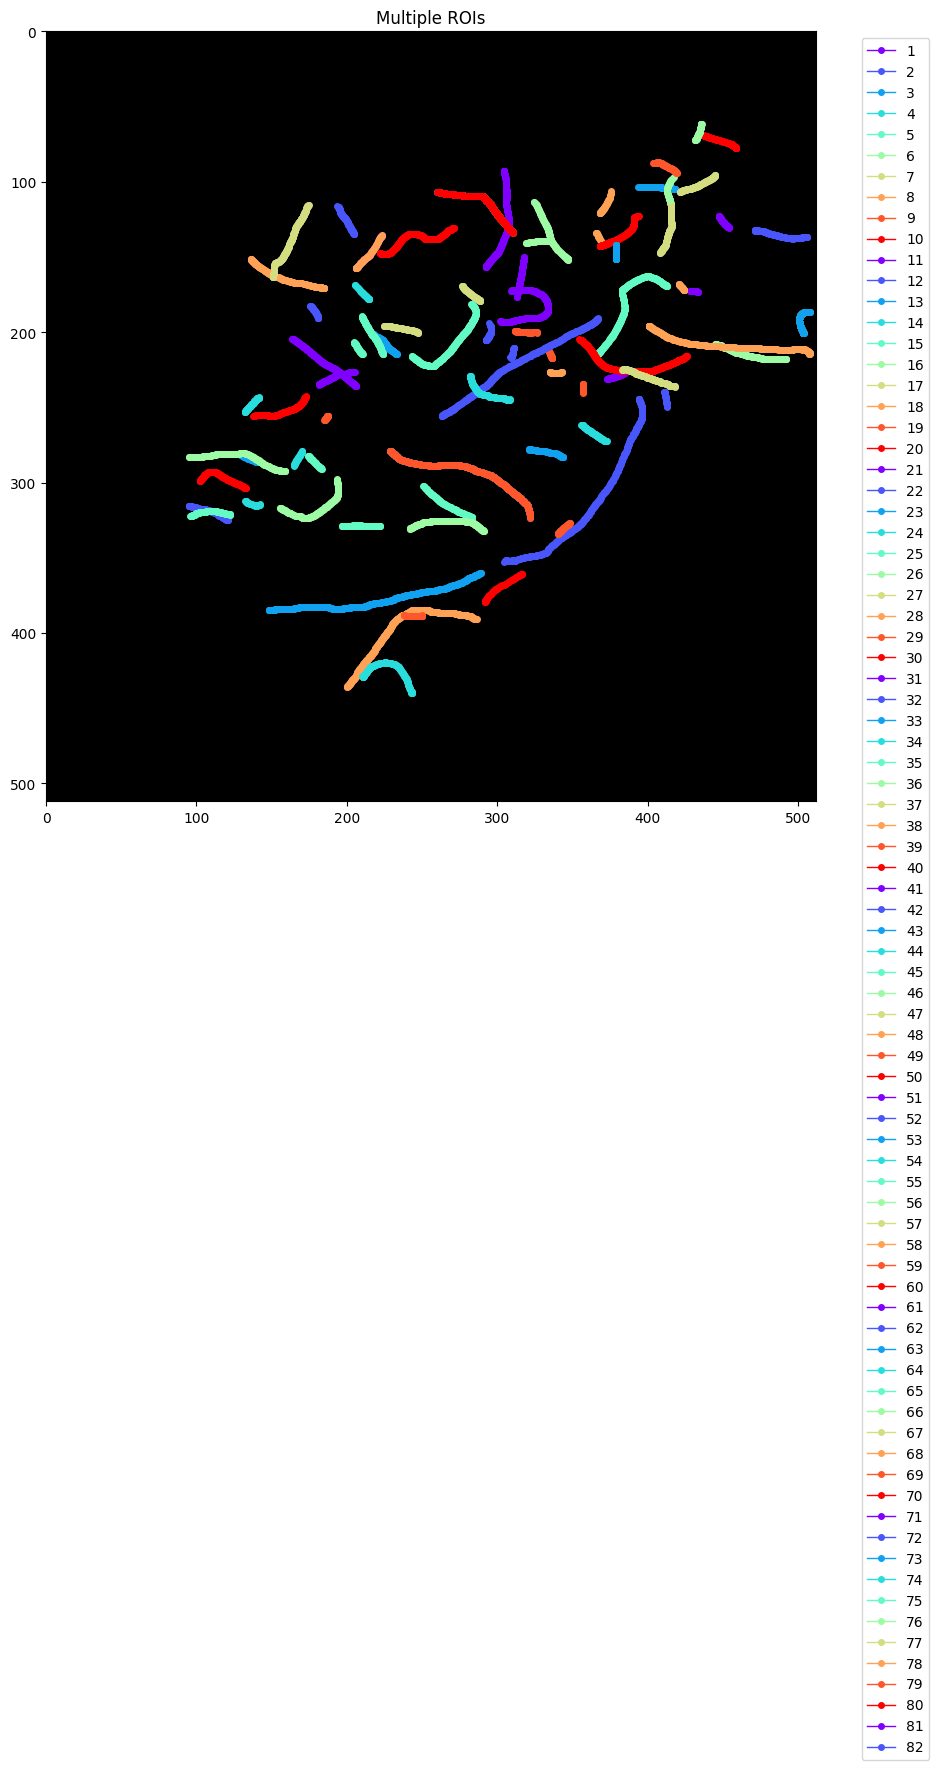

In [28]:
plot_rois(synthetic_dataset["SS1"])

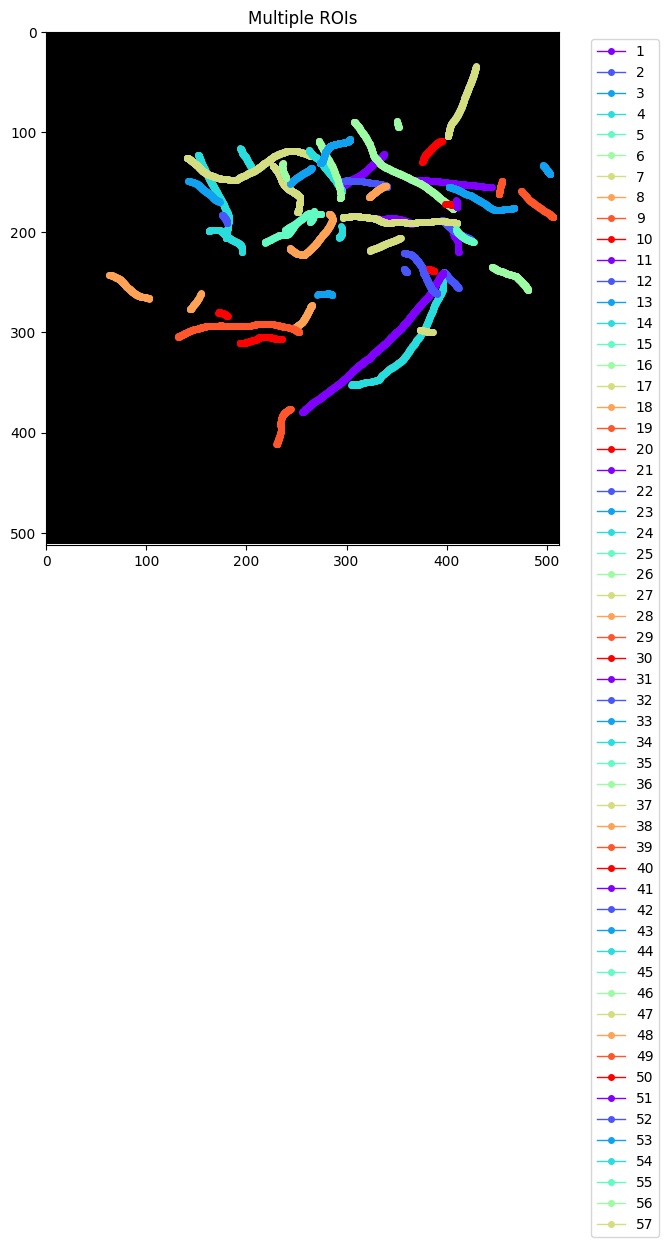

In [31]:
#plotting synthetic dataset
plot_rois(synthetic_dataset["SS2"])

In [33]:
# synthetic_dataset

In [43]:
cAB = []
for k in roi_data.keys():
    if "AB" in str(k):
        cAB.append(len(roi_data[k]))
cSS = [len(synthetic_dataset[k]) for k in synthetic_dataset.keys()]

## Kolmogorov-Smirnov (KS) Test

The Kolmogorov-Smirnov test is a non-parametric test used to compare two samples, determining if they come from the same distribution.

### Key Features:
- Non-parametric: It doesn't assume any particular distribution of the data.
- Sensitive to differences in both location and shape of the cumulative distribution functions of the two samples.
- Can handle different sample sizes.

### How it works:
1. It calculates the maximum distance between the cumulative distribution functions of the two samples.
2. This maximum distance is compared to a critical value to determine statistical significance.

### Strengths:
- Simple to understand and implement.
- Suitable for continuous distributions.

### Limitations:
- Less sensitive to differences at the tails of the distributions.
- May be less powerful than some other tests for certain types of differences.

## Anderson-Darling (AD) Test

The Anderson-Darling test is another non-parametric test used to compare two samples. It's often considered more powerful than the KS test, especially for detecting differences in the tails of the distributions.

### Key Features:
- Non-parametric: No assumption about the underlying distribution of the data.
- More sensitive to differences in the tails of the distributions compared to the KS test.
- Can handle different sample sizes.

### How it works:
1. It calculates a weighted average of the squared difference between the two empirical distribution functions.
2. The weights are larger in the tails of the distribution, making it more sensitive to differences there.

### Strengths:
- More powerful than the KS test for many types of differences between distributions.
- Particularly good at detecting differences in the tails of the distributions.

### Limitations:
- Slightly more complex to calculate and interpret than the KS test.
- Like the KS test, it's most suitable for continuous distributions.

### Comparison:
- Both tests can handle different sample sizes and are non-parametric.
- The AD test is generally more powerful and sensitive, especially for differences in the tails of the distributions.
- The KS test is simpler and may be preferred when simplicity of interpretation is key.
- In practice, it's often useful to use both tests along with visual inspection of the data for a comprehensive analysis.

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.power import tt_ind_solve_power

def plot_side_by_side_normalized_histogram(cAB, cSS):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.hist(cAB, bins="auto", density=True, alpha=0.7, color='blue')
    ax1.set_title("Original Data")
    ax1.set_xlabel("Number of Filaments")
    ax1.set_ylabel("Density")

    ax2.hist(cSS, bins="auto", density=True, alpha=0.7, color='red')
    ax2.set_title("Synthetic Data")
    ax2.set_xlabel("Number of Filaments")
    ax2.set_ylabel("Density")

    plt.tight_layout()
    plt.show()

def perform_ks_test(cAB, cSS):
    ks_statistic, p_value = stats.ks_2samp(cAB, cSS)

    print("Kolmogorov-Smirnov Test Results:")
    print(f"KS Statistic: {ks_statistic}")
    print(f"p-value: {p_value}")

    if p_value < 0.05:
        print("The distributions are significantly different (p < 0.05)")
    else:
        print("There is no significant difference between the distributions (p >= 0.05)")

    # Calculate effect size (Cohen's d)
    mean_diff = np.mean(cAB) - np.mean(cSS)
    pooled_std = np.sqrt((np.var(cAB, ddof=1) + np.var(cSS, ddof=1)) / 2)
    effect_size = abs(mean_diff / pooled_std)

    # Calculate power
    power = tt_ind_solve_power(effect_size=effect_size, nobs1=len(cAB), ratio=len(cSS)/len(cAB), alpha=0.05)
    print(f"KS Test Power: {power}")

def perform_anderson_darling_test(cAB, cSS):
    combined = np.concatenate([cAB, cSS])
    ranks = stats.rankdata(combined)

    n1 = len(cAB)
    ranks1 = ranks[:n1]
    ranks2 = ranks[n1:]

    n2 = len(cSS)
    n = n1 + n2
    A2 = -n - (1/n1 + 1/n2) * sum((2*i-1) * (np.log(ranks1[i-1]) + np.log(n+1-ranks2[i-1]))
                                  for i in range(1, n1+1))

    h = 1 / (1/n1 + 1/n2)
    A2_star = A2 * (1 + 0.75/n + 2.25/n**2)

    if A2_star < 0.2:
        p = 1 - np.exp(-13.436 + 101.14*A2_star - 223.73*A2_star**2)
    elif A2_star < 0.34:
        p = 1 - np.exp(-8.318 + 42.796*A2_star - 59.938*A2_star**2)
    elif A2_star < 0.6:
        p = np.exp(0.9177 - 4.279*A2_star - 1.38*A2_star**2)
    else:
        p = np.exp(1.2937 - 5.709*A2_star + 0.0186*A2_star**2)

    print("Anderson-Darling Test Results:")
    print(f"A2 statistic: {A2}")
    print(f"Standardized A2 statistic: {A2_star}")
    print(f"p-value: {p}")

    if p < 0.05:
        print("The distributions are significantly different (p < 0.05)")
    else:
        print("There is no significant difference between the distributions (p >= 0.05)")

    # Calculate effect size (Cohen's d)
    mean_diff = np.mean(cAB) - np.mean(cSS)
    pooled_std = np.sqrt((np.var(cAB, ddof=1) + np.var(cSS, ddof=1)) / 2)
    effect_size = abs(mean_diff / pooled_std)

    # Calculate power
    power = tt_ind_solve_power(effect_size=effect_size, nobs1=len(cAB), ratio=len(cSS)/len(cAB), alpha=0.05)
    print(f"AD Test Power: {power}")


### Testing with Example 1

In [ ]:
# Main execution
cAB = []
for k in roi_data.keys():
    if "AB" in str(k):
        cAB.append(len(roi_data[k]))
cSS = [len(synthetic_dataset[k]) for k in synthetic_dataset.keys()]

plot_side_by_side_normalized_histogram(cAB, cSS)
perform_ks_test(cAB, cSS)
print("-"*25)
perform_anderson_darling_test(cAB, cSS)

### Testing With Different Sample Size

In [57]:
# Example usage:
key_values = ["AB 24", "AB 64", "AB 104", "AB 68", "AB 11", "AB 5", "AB 101", "AB 51", "AB 31", "AB 12"]
num_synthetic_sets = 10  # Change this to the number of synthetic sets you want
synthetic_dataset_2 = create_synthetic_dataset(roi_data, key_values, num_synthetic_sets)

# Print the results
print("Synthetic Dataset Summary:")
for key, data in synthetic_dataset_2.items():
    print(f"{key}: count {len(data)}")

Synthetic Dataset Summary:
SS1: count 78
SS2: count 99
SS3: count 80
SS4: count 113
SS5: count 127
SS6: count 73
SS7: count 110
SS8: count 89
SS9: count 66
SS10: count 77


In [52]:
# Main execution
cAB = []
for k in roi_data.keys():
    if "AB" in str(k):
        cAB.append(len(roi_data[k]))

cSS2 = []
for k in synthetic_dataset_2.keys():
    cSS2.append(len(synthetic_dataset_2[k]))

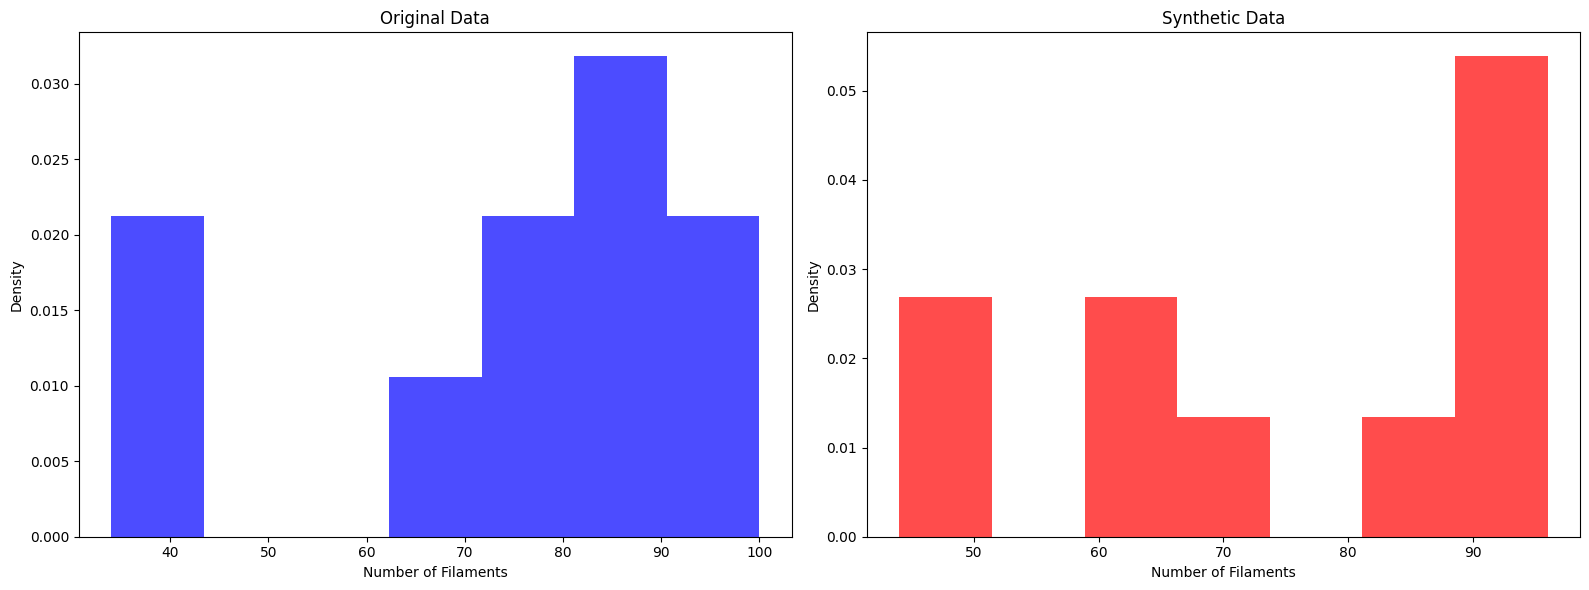

Kolmogorov-Smirnov Test Results:
KS Statistic: 0.3
p-value: 0.7869297884777761
There is no significant difference between the distributions (p >= 0.05)
KS Test Power: 0.05095981935237327
-------------------------
Anderson-Darling Test Results:
A2 statistic: -99.96147628181062
Standardized A2 statistic: -104.27231494646371
p-value: 1.0
There is no significant difference between the distributions (p >= 0.05)
AD Test Power: 0.05095981935237327


In [53]:

plot_side_by_side_normalized_histogram(cAB, cSS2)
perform_ks_test(cAB, cSS2)
print("-"*25)
perform_anderson_darling_test(cAB, cSS2)